**Unsupervised Macnine Learning**: is a type of machine learning that letting the machine explore the data and discover patterns on its own.
* Data has no labels
* The model is not told the correct answer like in supervised machine learning but finds hidden patterns , group or structure.

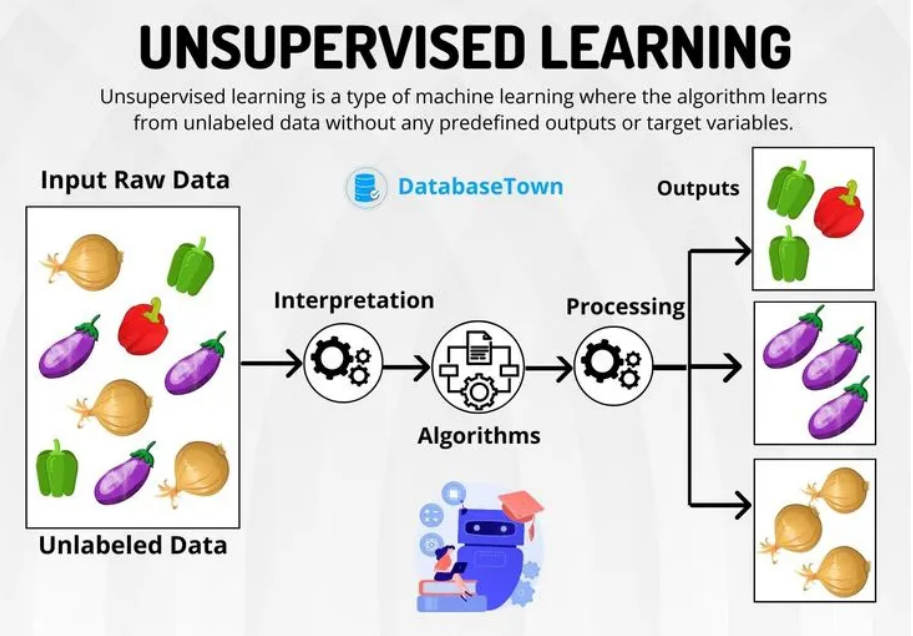

**Algorithms**
* K-means Clustering
* Hierarchical Clustering



** K-means Clustering**
* Cluster: We will partion our dataset inot K distinct group (Cluster) based on similarity (distance)
* Centroid: nearest mean cluster

In [ ]:
#Import All Required Librarires
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [ ]:
dataset={
    'Entry_Time':[9,10,11,12,15,16,17,18,19,20,21,22],
    'Duration':[10,60,20,120,30,40,50,70,80,90,130,140]
}

In [ ]:
df=pd.DataFrame(dataset)
df

,Entry_Time,Duration
0,9,10
1,10,60
2,11,20
3,12,120
4,15,30
5,16,40
6,17,50
7,18,70
8,19,80
9,20,90


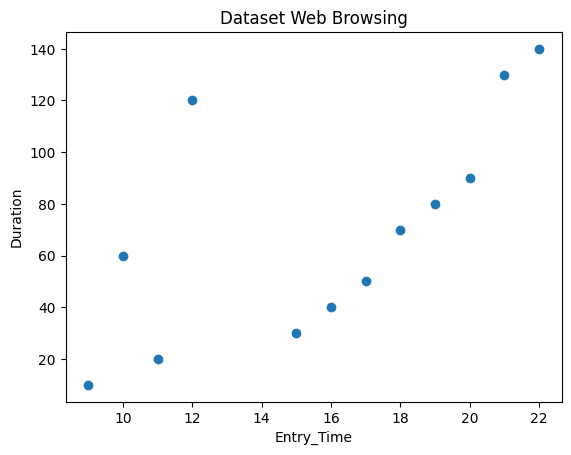

In [ ]:
# Visualize data
plt.scatter(df.Entry_Time,df.Duration)
plt.xlabel('Entry_Time')
plt.ylabel('Duration')
plt.title('Dataset Web Browsing')
plt.show()

In [ ]:
model_kmeans=KMeans(n_clusters=3,random_state=42) #Creating the model


In [ ]:
df['Cluster']=model_kmeans.fit_predict(df[['Entry_Time','Duration']]) #Train the model and assign Cluster Labels


,Cluster
0,0
1,2
2,0
3,1
4,0
5,0
6,2
7,2
8,2
9,2


In [ ]:
df

,Entry_Time,Duration,Cluster
0,9,10,0
1,10,60,2
2,11,20,0
3,12,120,1
4,15,30,0
5,16,40,0
6,17,50,2
7,18,70,2
8,19,80,2
9,20,90,2


In [ ]:
centroid=model_kmeans.cluster_centers_

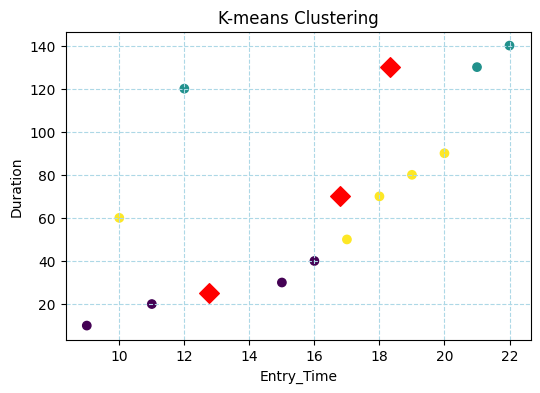

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(df.Entry_Time,df.Duration,c=df.Cluster)
plt.scatter(centroid[:,0],centroid[:,1],s=100,c='red',marker='D')
plt.xlabel('Entry_Time')
plt.ylabel('Duration')
plt.title('K-means Clustering')
plt.grid(True,linestyle='--',color='lightblue')
plt.show()


### Use customers.csv from
* https://github.com/salman1256/aiml_dec_2025/tree/master/Day-20
* Do the Customer Segmentation(groupin or clustering) based on Annual Income and SpendingScore using K-means clustering
* n_clusters=5

**Hierarchical Clustering** : is a unsupervise Machine learning technique that groups data into a hierarchy of clusters.
* Build a tree like structure
* No need to choose the cluster intially
* show the relationship using tree like structrue (dendogram)

In [ ]:
#import Required Libraries
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage

In [ ]:
dataset={
    'Experience':[1,2,3,7,8,9,4],
    'Salary':[2500,3200,3500,7000,78000,8700,4000]
}

In [ ]:
df_salary=pd.DataFrame(dataset)
df_salary

,Experience,Salary
0,1,2500
1,2,3200
2,3,3500
3,7,7000
4,8,78000
5,9,8700
6,4,4000


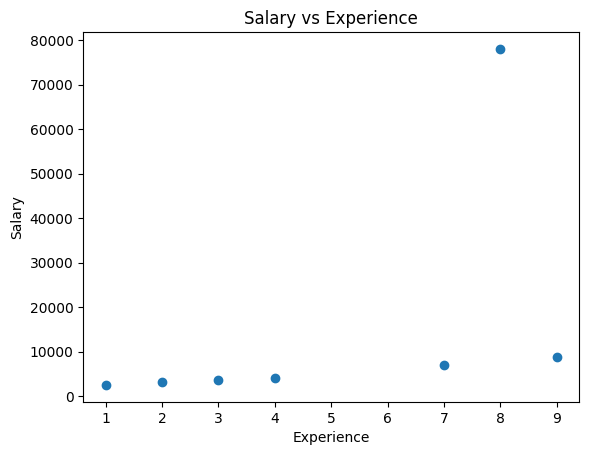

In [ ]:
#Visualize data
plt.scatter(df_salary['Experience'],df_salary['Salary'])
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()

In [ ]:
#creating dendogram for this dataframe
#create linkage matrix
linkage_matrix=linkage(df_salary,method='ward')

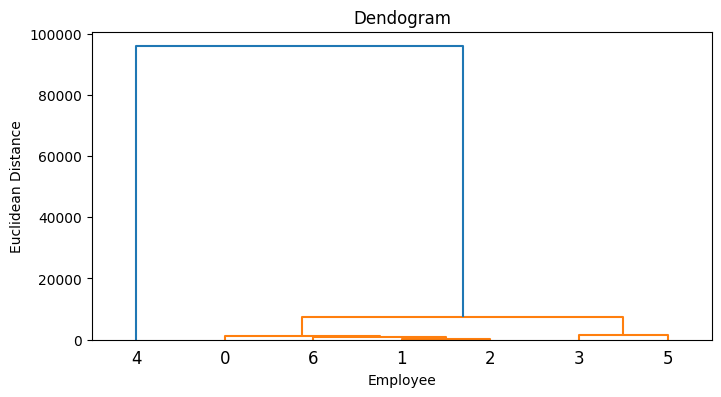

In [ ]:
plt.figure(figsize=(8,4))
dendrogram(linkage_matrix)
plt.title('Dendogram')
plt.xlabel('Employee')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
hc_model=AgglomerativeClustering(n_clusters=3,linkage='ward')

In [ ]:
df_salary['Cluster']=hc_model.fit_predict(df_salary[['Experience','Salary']])

In [ ]:
df_salary

,Experience,Salary,Cluster
0,1,2500,2
1,2,3200,2
2,3,3500,2
3,7,7000,0
4,8,78000,1
5,9,8700,0
6,4,4000,2


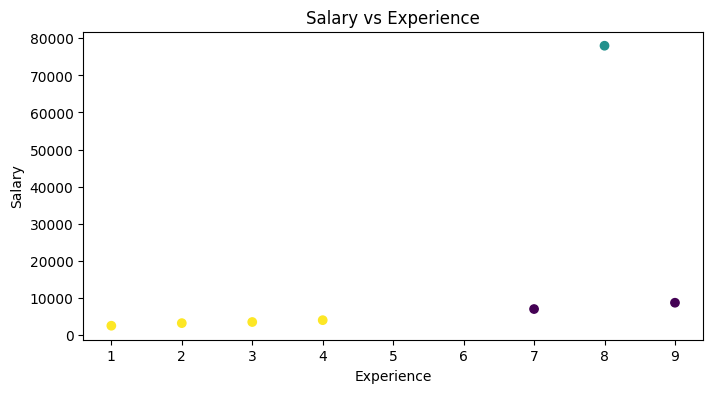

In [ ]:
plt.figure(figsize=(8,4))
plt.scatter(df_salary['Experience'],df_salary['Salary'],c=df_salary['Cluster'])
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()

# One More Example

In [ ]:
data={ 'Customer_1':[500,3],
      'Customer_2':[520,4],
      'Customer_3':[480,2],
       'Customer_4':[550,5],
       'Customer_5':[1500,8],
       'Customer_6':[1200,7],
       'Customer_7':[1700,9]
}
#monthly_spend,visit_per_month

In [ ]:
df=pd.DataFrame(data)
df

,Customer_1,Customer_2,Customer_3,Customer_4,Customer_5,Customer_6,Customer_7
0,500,520,480,550,1500,1200,1700
1,3,4,2,5,8,7,9


In [ ]:
df=pd.DataFrame(data,index=['monthly_spend','visit_per_month'])
df
#

,Customer_1,Customer_2,Customer_3,Customer_4,Customer_5,Customer_6,Customer_7
monthly_spend,500,520,480,550,1500,1200,1700
visit_per_month,3,4,2,5,8,7,9


In [ ]:
df=pd.DataFrame(data,index=['monthly_spend','visit_per_month']).T
df

,monthly_spend,visit_per_month
Customer_1,500,3
Customer_2,520,4
Customer_3,480,2
Customer_4,550,5
Customer_5,1500,8
Customer_6,1200,7
Customer_7,1700,9


* Create Dendogram for this dataframe
* Create cluster from Dendogram
* Visualize the Cluster (i.e. Create Scatter Plot)


In [ ]:
linkage_matrix=linkage(df,method='ward')

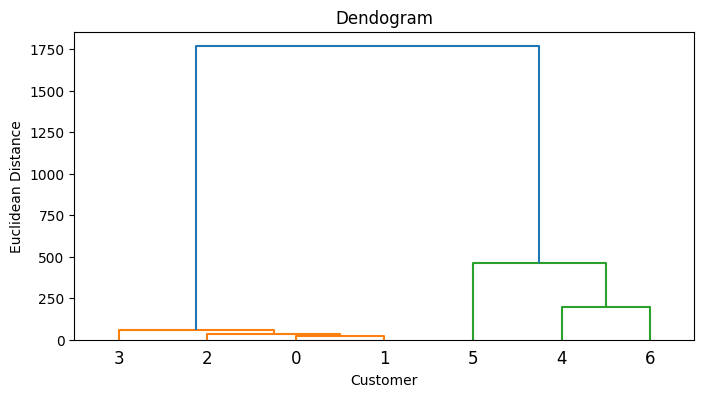

In [ ]:
plt.figure(figsize=(8,4))
dendrogram(linkage_matrix)
plt.title('Dendogram')
plt.xlabel('Customer')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
model=AgglomerativeClustering(n_clusters=2,linkage='ward')

In [ ]:
df['Cluster']=model.fit_predict(df)

In [ ]:
df

,monthly_spend,visit_per_month,Cluster
Customer_1,500,3,1
Customer_2,520,4,1
Customer_3,480,2,1
Customer_4,550,5,1
Customer_5,1500,8,0
Customer_6,1200,7,0
Customer_7,1700,9,0


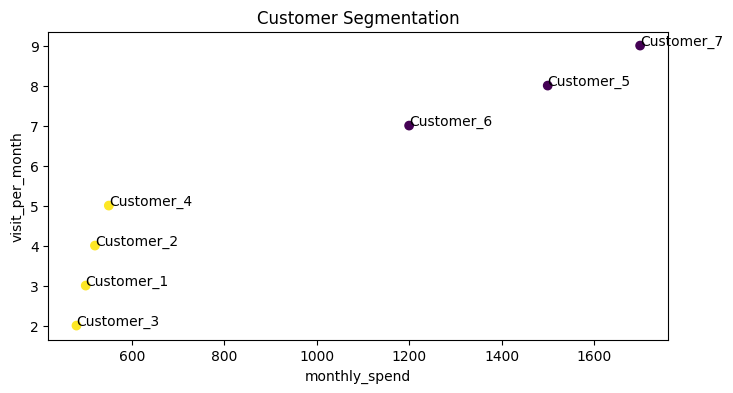

In [ ]:
plt.figure(figsize=(8,4))
plt.scatter(df['monthly_spend'],df['visit_per_month'],c=df['Cluster'])
for i in df.index:
  plt.text(df.loc[i,'monthly_spend'],df.loc[i,'visit_per_month'],i)
plt.xlabel('monthly_spend')
plt.ylabel('visit_per_month')
plt.title('Customer Segmentation')
plt.show()

**DBSCAN:Density Based Clustering of Application with Noise**: is an unsupervised machine learning clustering algorithms
* finds cluster onf any shape
* automatically detects noise
* useful in real world mess data
* **epsilon**:maximum distance between two points to be considered as neighbour , defines nieghborhood distance  , its radius around a point
* **min_samples**: Minimum Number of points to form a dense region



In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [63]:
dataset={
    'Latitude':[11.0,12.97,12.98,12.99,13.0,13.01,13.02,13.03,13.04,19.07,19.08,19.09,28.61],
    'Longitude':[75.59,77.60,77.61,77.62,72.87,72.88,72.89,72.90,72.95,72.91,72.95,72.96,77.9]
    }

In [64]:
df=pd.DataFrame(dataset)
df

,Latitude,Longitude
0,11.00,75.59
1,12.97,77.60
2,12.98,77.61
3,12.99,77.62
4,13.00,72.87
5,13.01,72.88
6,13.02,72.89
7,13.03,72.90
8,13.04,72.95
9,19.07,72.91


In [65]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

In [66]:
df_scaled

array([[-0.95892293,  0.46004037],
       [-0.5347043 ,  1.38188508],
       [-0.53255091,  1.38647137],
       [-0.53039751,  1.39105766],
       [-0.52824412, -0.78743107],
       [-0.52609073, -0.78284478],
       [-0.52393733, -0.77825849],
       [-0.52178394, -0.77367219],
       [-0.51963054, -0.75074073],
       [ 0.77886606, -0.7690859 ],
       [ 0.78101945, -0.75074073],
       [ 0.78317284, -0.74615444],
       [ 2.83320396,  1.51947384]])

In [67]:
model_dbscan=DBSCAN(eps=0.1,min_samples=3,metric='euclidean') #creting model

In [68]:
df['Cluster']=model_dbscan.fit_predict(df_scaled) #train predict assing Cluster Label

In [69]:
df

,Latitude,Longitude,Cluster
0,11.00,75.59,-1
1,12.97,77.60,0
2,12.98,77.61,0
3,12.99,77.62,0
4,13.00,72.87,1
5,13.01,72.88,1
6,13.02,72.89,1
7,13.03,72.90,1
8,13.04,72.95,1
9,19.07,72.91,2


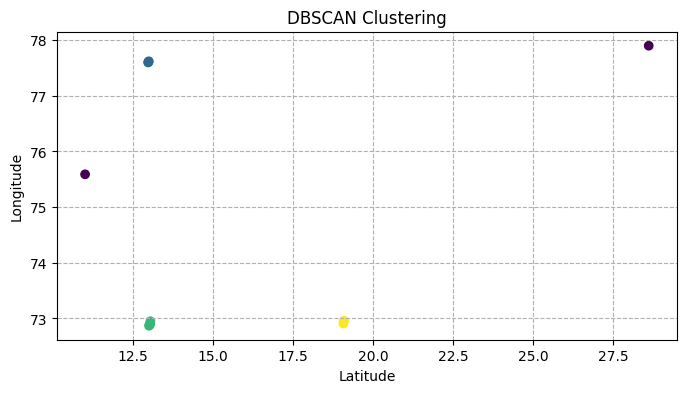

In [70]:
plt.figure(figsize=(8,4))
plt.scatter(df['Latitude'],df['Longitude'],c=df['Cluster'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('DBSCAN Clustering')
plt.grid(True,linestyle='--')
plt.show()